**Perform Partial dependence plot (PDP)**

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('cali.csv')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
X=df.drop(columns='target')
y=df['target']

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

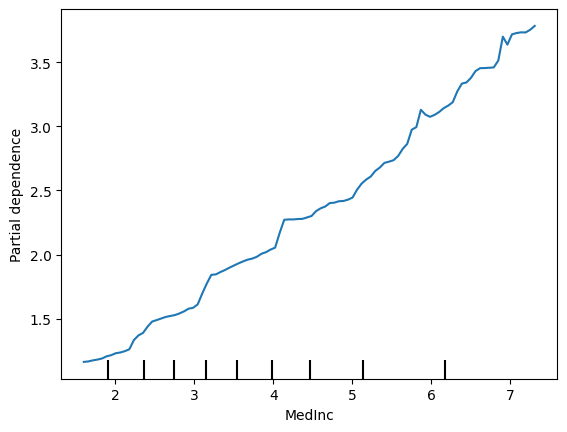

In [5]:
PartialDependenceDisplay.from_estimator(model,X_train,features=['MedInc'],feature_names=df.columns)
plt.show()

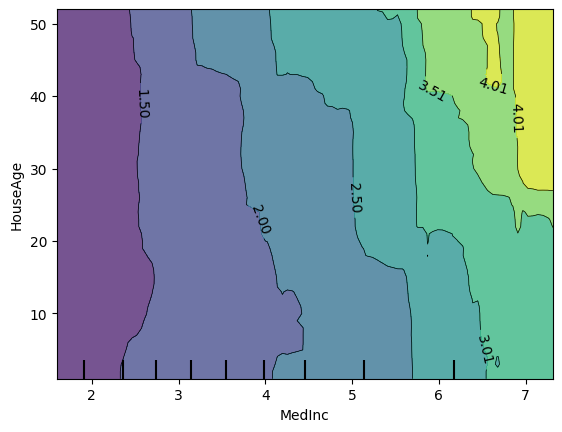

In [6]:
PartialDependenceDisplay.from_estimator(model,X_train,[('MedInc','HouseAge')],feature_names=df.columns)
plt.show()

**LIME FOR IMAGE**

In [7]:
from tensorflow.keras.applications.xception import Xception,decode_predictions
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.utils import to_categorical
from lime import lime_image
import seaborn as sns
from skimage.color import label2rgb
import warnings
warnings.filterwarnings('ignore')

In [8]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

In [9]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train_cat, epochs=2, batch_size=64, validation_split=0.1)


Epoch 1/2
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8629 - loss: 0.4932 - val_accuracy: 0.9767 - val_loss: 0.0903
Epoch 2/2
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9730 - loss: 0.0897 - val_accuracy: 0.9810 - val_loss: 0.0701


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━

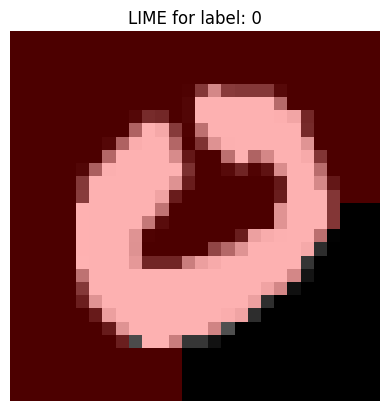

In [10]:
from lime import lime_image
from skimage.color import label2rgb
import cv2
import numpy as np
import matplotlib.pyplot as plt
explainer = lime_image.LimeImageExplainer()
idx = 25
test_image = x_test[idx]

# Convert LIME's RGB input back to grayscale
predict_fn = lambda x: model.predict(
    np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in x])[..., np.newaxis]
)

explanation = explainer.explain_instance(
    image=test_image.squeeze(),  # shape: (28, 28)
    classifier_fn=predict_fn,
    top_labels=1,
    hide_color=0,
    num_samples=1000
)

temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],
    positive_only=True,
    hide_rest=False
)

plt.imshow(label2rgb(mask, temp, bg_label=0))
plt.title(f"LIME for label: {y_test[idx]}")
plt.axis('off')
plt.show()
